In [24]:
from sklearn.cluster import KMeans
import numpy as np
from pandas import DataFrame
from math import pow
import math

class XBOS:
    
    def __init__(self,n_clusters=15,effectiveness=500,max_iter=2):
        self.n_clusters=n_clusters
        self.effectiveness=effectiveness
        self.max_iter=max_iter
        self.kmeans = {}
        self.cluster_score = {}
        
    def fit(self, data):
        length = len(data)
        for column in data.columns:
            kmeans = KMeans(n_clusters=self.n_clusters,max_iter=self.max_iter)
            self.kmeans[column]=kmeans
            kmeans.fit(data[column].values.reshape(-1,1))
            assign = DataFrame(kmeans.predict(data[column].values.reshape(-1,1)),columns=['cluster'])
            cluster_score=assign.groupby('cluster').apply(len).apply(lambda x:x/length)
            ratio=cluster_score.copy()
        
            sorted_centers = sorted(kmeans.cluster_centers_)
            max_distance = ( sorted_centers[-1] - sorted_centers[0] )[ 0 ]
        
            for i in range(self.n_clusters):
                for k in range(self.n_clusters):
                    if i != k:
                        dist = abs(kmeans.cluster_centers_[i] - kmeans.cluster_centers_[k])/max_distance
                        effect = ratio[k]*(1/pow(self.effectiveness,dist))
                        cluster_score[i] = cluster_score[i]+effect
                        
            self.cluster_score[column] = cluster_score
                    
    def predict(self, data):
        length = len(data)
        score_array = np.zeros(length)
        for column in data.columns:
            kmeans = self.kmeans[ column ]
            cluster_score = self.cluster_score[ column ]
            
            assign = kmeans.predict( data[ column ].values.reshape(-1,1) )
            #print(assign)
            
            for i in range(length):
                score_array[i] = score_array[i] + math.log10( cluster_score[assign[i]] )
            
        return score_array
    
    def fit_predict(self,data):
        self.fit(data)
        return self.predict(data)

In [57]:
import pandas as pd
dataset =pd.DataFrame({'attr1':[1,1,1,1,2,2,2,2,2,2,2,2,3,5,5,6,6,7,7,7,7,7,7,7,15],
 'attr2':[1,1,1,1,2,2,2,2,2,2,2,2,3,5,5,6,6,7,7,7,13,13,13,14,15]})
orig = dataset.copy()

In [58]:
xbos = XBOS(n_clusters=3)
result = xbos.fit_predict(orig)

C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mrrr_\AppData\Local\Temp\ipykernel_5484\215075392.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  effect = ratio[k]*(1/pow(self.effectiveness,dist))
C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mrrr_\AppData\Local\Temp\ipykernel_5484\215075392.py:33: DeprecationWarning

In [59]:
for i in result:
 print(round(i, 2))

-0.51
-0.51
-0.51
-0.51
-0.51
-0.51
-0.51
-0.51
-0.51
-0.51
-0.51
-0.51
-0.51
-0.78
-0.78
-0.78
-0.78
-0.78
-0.78
-0.78
-0.99
-0.99
-0.99
-0.99
-1.99


In [60]:
orig['cluster_label'] = result

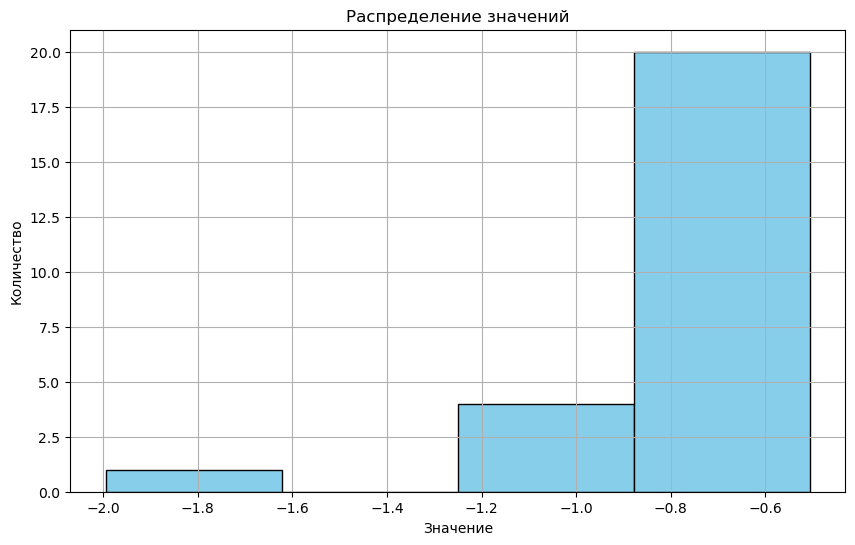

In [61]:
import matplotlib.pyplot as plt

# Значения
values = result

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(values, bins=len(set(values)), color='skyblue', edgecolor='black')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.title('Распределение значений')
plt.grid(True)
plt.show()
